# Support Vector Machines: Wine Quality

BUSMGT 7247

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC

# Options for plots
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
sns.set()

# Seed the random number generator for reproducible results
random_state = 1000
np.random.seed(random_state)

## Load Data

### Data Description

The dataset contains observations of wines from the white variant of the Portuguese Vinho Verde. The variables comprise physicochemical measurements and a quality rating, which ranges from 0 to 10.

Source: [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)

In [2]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
# Map numeric quality ratings to high quality (1) and low quality (0)
df['QualityBinary'] = df['quality'].apply(lambda x: 1 if x > 6 else 0)
df['QualityBinary'].value_counts()

0    1382
1     217
Name: QualityBinary, dtype: int64

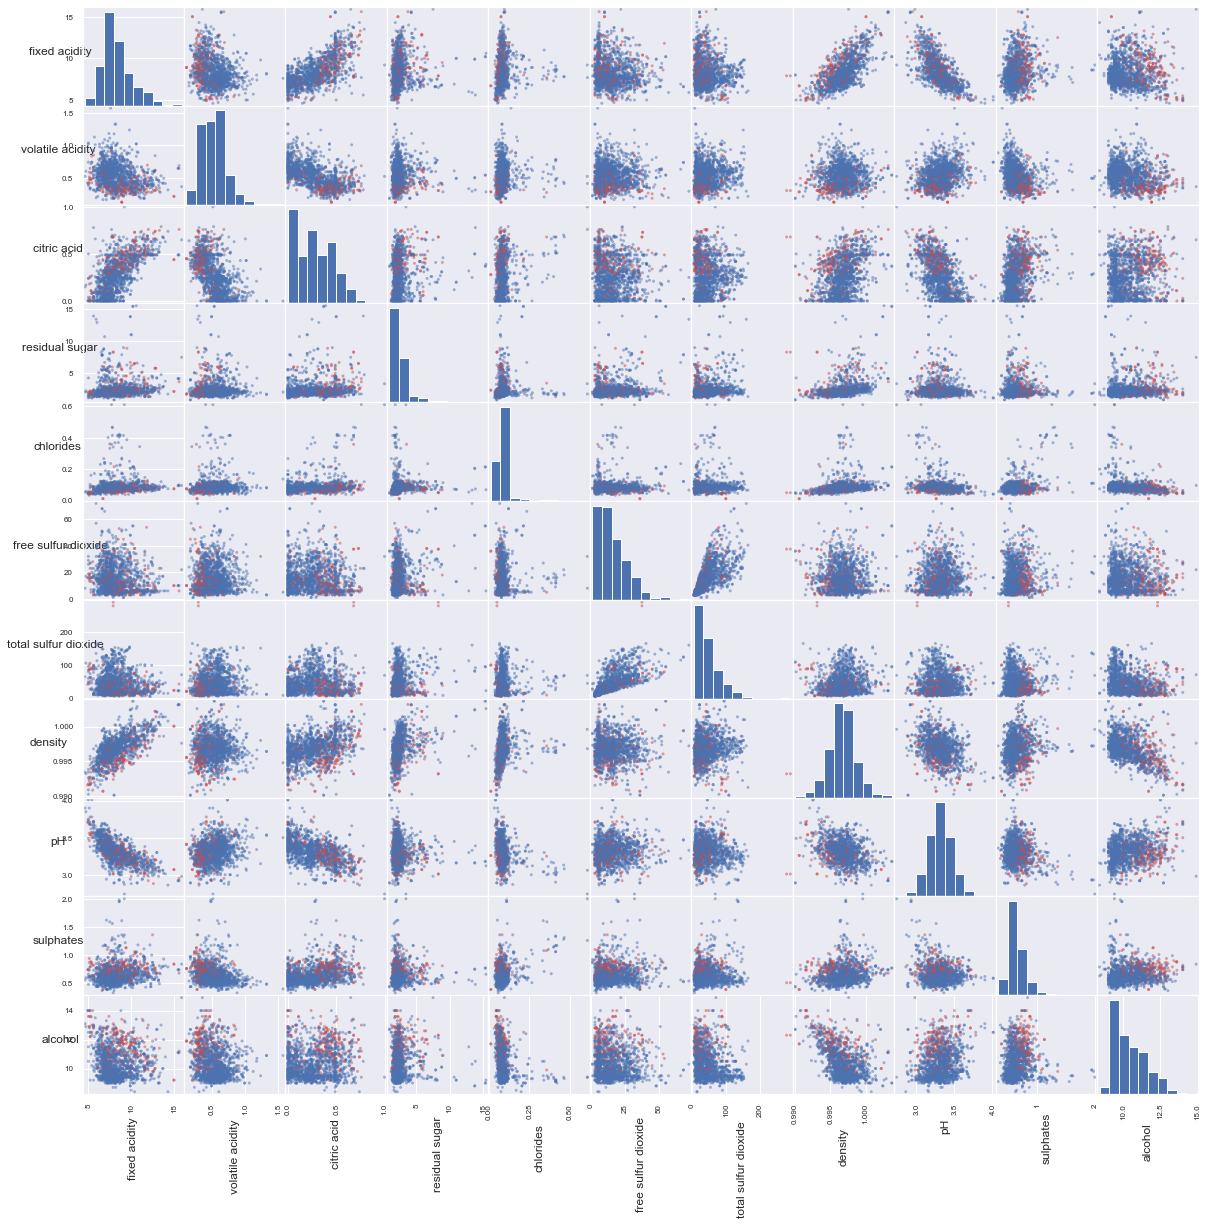

In [5]:
colors = df['QualityBinary'].apply(lambda x: 'r' if x == 1 else 'b')
axs = scatter_matrix(df.drop(['quality', 'QualityBinary'], axis=1),
                     c=colors, figsize=(20, 20))

for row in axs:
    for ax in row:
        ax.xaxis.label.set_rotation(90)
        ax.yaxis.label.set_rotation(0)

plt.show()

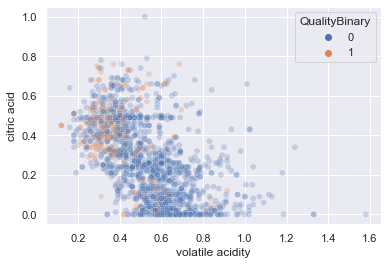

In [6]:
# Create scatterplots for a specific pair of variables
sns.scatterplot(data=df, x='volatile acidity', y='citric acid',
                hue='QualityBinary', alpha=0.25)
plt.show()

## Linear Classification

In [7]:
# Fit an SVM classifier step by step
y = df['QualityBinary']
X = df.drop(['quality', 'QualityBinary'], axis=1)

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

svc = LinearSVC(max_iter=10000)
svc.fit(X_scale, y)
y_pred = svc.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.81      0.85      1382
           1       0.25      0.40      0.31       217

    accuracy                           0.76      1599
   macro avg       0.57      0.61      0.58      1599
weighted avg       0.81      0.76      0.78      1599



In [8]:
# Fit an SVM classifier using a scikit-learn pipeline
svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(max_iter=10000))
])
svc_pipe.fit(X, y)
y_pred = svc_pipe.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1382
           1       0.69      0.25      0.37       217

    accuracy                           0.88      1599
   macro avg       0.79      0.62      0.65      1599
weighted avg       0.87      0.88      0.86      1599



In [9]:
# Use a grid search to select a value of C
param_grid = {
    'svc__C':[0.1, 1.0, 2]
}

svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', LinearSVC(max_iter=10000))
])

svc_grid = GridSearchCV(svc_pipe, param_grid=param_grid)
svc_grid.fit(X, y)
print(svc_grid.best_params_)

{'svc__C': 1.0}


In [10]:
y_pred = svc_grid.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      1382
           1       0.69      0.25      0.37       217

    accuracy                           0.88      1599
   macro avg       0.79      0.62      0.65      1599
weighted avg       0.87      0.88      0.86      1599



## Nonlinear Classification

In [11]:
# Use a grid search to select kernel as well as
# values of C and gamma
param_grid = {
    'svc__C':[0.9, 1.0, 1.1],
    'svc__kernel':['rbf', 'linear'],
    'svc__gamma':[0.8, 1.0, 1.2]
}

svc_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

svc_grid = GridSearchCV(svc_pipe, param_grid=param_grid)
svc_grid.fit(X, y)
print(svc_grid.best_params_)

{'svc__C': 0.9, 'svc__gamma': 1.2, 'svc__kernel': 'rbf'}


In [12]:
y_pred = svc_grid.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1382
           1       0.99      0.87      0.92       217

    accuracy                           0.98      1599
   macro avg       0.98      0.93      0.96      1599
weighted avg       0.98      0.98      0.98      1599



### Exercise

Use GridSearchCV to search over different kernels as well as values of C and gamma to see whether you can improve the model.

## Exercise

Redo the analysis using a train-test split. Evaluate the potential generalizability of the model.